In [315]:
import pandas as pd
import numpy as np
import groups_cols
from matplotlib import pyplot as plt
tables = {}

# Mean and std tables

In [2]:
iqr = pd.read_csv('IQR.csv', sep=';')
iqr = iqr.set_index('ACP')

In [3]:
iqr.head()

,Unnamed: 0,pol,q3,q1,median,IQR,mean,std,count
ACP,,,,,,,,,
all,0,POLICIES_buy,0.0,0.0,0.0,0.0,0.036194,0.186773,250592.0
all,1,POLICIES_rent,1.0,0.0,0.0,1.0,0.310333,0.462630,250070.0
all,2,POLICIES_wage,1.0,0.0,0.0,1.0,0.329212,0.469927,250015.0
all,3,POLICIES_no_policy,0.0,0.0,0.0,0.0,0.178652,0.383060,249323.0
PROCESSING_ACPS_BELO HORIZONTE,4,POLICIES_buy,0.0,0.0,0.0,0.0,0.094223,0.292138,5487.0


In [4]:
mean_policy_acp = pd.DataFrame(columns=[['Municipality', 'No policy', 'Buy', 'Rent', 'Wage']])
std_policy_acp = mean_policy_acp.copy()
acps = ['all'] + groups_cols.abm_dummies['acps']

for acp in acps:
    row_mean = [acp]
    row_std = row_mean.copy()
    for policy in ['POLICIES_no_policy','POLICIES_buy', 'POLICIES_rent', 'POLICIES_wage']:
        dataframe_mean = iqr.groupby(['ACP','pol'])['mean'].mean()
        dataframe_std = iqr.groupby(['ACP','pol'])['std'].mean()
        if policy == 'POLICIES_no_policy':
            mean = dataframe_mean[acp, policy].round(decimals=4)*100
            std = dataframe_std[acp, policy].round(decimals=4)*100
        else:
            mean = (dataframe_mean[acp, policy].round(decimals=4)*100-row_mean[1])
            std = (dataframe_std[acp, policy].round(decimals=4)*100-row_std[1])
        row_mean.append(mean)
        row_std.append(std)
    mean_policy_acp.at[acp] = row_mean
    std_policy_acp.at[acp] = row_std

for df in [mean_policy_acp, std_policy_acp]:
    df.reset_index(drop=True, inplace=True)
    df.sort_values(ascending=False, by=('No policy',), inplace=True)
    df.replace({('Municipality',): groups_cols.abm_dummies_show})

mean_policy_acp = mean_policy_acp.replace({('Municipality',): groups_cols.abm_dummies_show})
std_policy_acp = std_policy_acp.replace({('Municipality',): groups_cols.abm_dummies_show})

In [5]:
mean_policy_acp

,Municipality,No policy,Buy,Rent,Wage
1,Belo Horizonte,100.0,-90.58,0.0,0.0
7,Sao Paulo,29.84,-1.14,-0.9,7.23
8,Joinville,19.43,-14.26,7.67,8.91
9,Campo Grande,18.63,-15.02,10.02,8.91
15,Joao Pessoa,18.47,-14.78,10.11,8.97
17,Maceio,18.43,-15.06,9.84,9.83
22,Maringa,18.14,-14.33,10.16,10.86
11,Feira de Santana,17.88,-14.9,10.29,9.08
0,all,17.87,-14.25,13.16,15.05
24,Cuiaba,17.59,-14.91,10.7,10.21


In [6]:
std_policy_acp

,Municipality,No policy,Buy,Rent,Wage
7,Sao Paulo,45.75,-0.51,-0.4,2.55
8,Joinville,39.56,-17.41,4.89,5.51
9,Campo Grande,38.94,-20.3,6.27,5.73
15,Joao Pessoa,38.8,-19.95,6.38,5.82
17,Maceio,38.78,-20.74,6.25,6.25
22,Maringa,38.54,-19.39,6.51,6.84
11,Feira de Santana,38.32,-21.31,6.66,6.05
0,all,38.31,-19.63,7.95,8.68
24,Cuiaba,38.08,-21.93,6.96,6.72
21,Uberlandia,38.06,-18.59,6.99,6.82


### No policy is in absolute value (%) and all other columns are in percentage points of difference to the No policy case. NH-SL: Novo Hamburgo/Sao Leopoldo, SJRP: Sao Jose do Rio Preto, SJC: Sao Jose dos Campos

# Differences in dummies

In [7]:
current = pd.read_csv('../pre_processed_data/counting_Current.csv', sep=';').round(decimals=4)
current.replace({'Unnamed: 0': groups_cols.abm_dummies_show}, inplace=True)

In [8]:
current

,Unnamed: 0,size,optimal,non-optimal
0,Policy: buy,0.1219,0.0259,0.9741
1,Policy: rent,0.1219,0.1037,0.8963
2,Policy: wage,0.1219,0.1393,0.8607
3,Policy: none,0.6343,0.0391,0.9609
4,Interest: fixed,0.0019,0.0000,1.0000
5,Interest: real,0.9962,0.0578,0.9422
6,Interest: nominal,0.0019,0.0000,1.0000
7,Belo Horizonte,0.0200,0.8108,0.1892
8,Fortaleza,0.0200,0.0315,0.9685
9,Porto Alegre,0.0200,0.0000,1.0000


In [9]:
tree = pd.read_csv('../pre_processed_data/counting_Tree.csv', sep=';').round(decimals=4)
tree.replace({'Unnamed: 0': groups_cols.abm_dummies_show}, inplace=True)

## differences in non-acp dummies

In [10]:
SON = pd.DataFrame()
SON_acp = SON.copy()
non_acps = list(range(0,7)) + list(range(36, 45))

In [11]:
for row in non_acps:
    to_add = {'Dummy' : tree.iloc[row, 0],
              'Size: sur': tree.iloc[row, 1]*100,
              'Size: ABM': current.iloc[row, 1]*100,
              'Opt: sur': tree.iloc[row, 2]*100,
              'Opt: ABM': current.iloc[row, 2]*100,
              'Non-opt: sur': tree.iloc[row, 3]*100,
              'Non-opt: ABM': current.iloc[row, 3]*100
    }
    print(to_add)
    SON = SON.append(to_add, ignore_index=True)

{'Dummy': 'Policy: buy', 'Size: sur': 25.06, 'Size: ABM': 12.19, 'Opt: sur': 3.62, 'Opt: ABM': 2.59, 'Non-opt: sur': 96.38, 'Non-opt: ABM': 97.41}
{'Dummy': 'Policy: rent', 'Size: sur': 25.009999999999998, 'Size: ABM': 12.19, 'Opt: sur': 31.03, 'Opt: ABM': 10.37, 'Non-opt: sur': 68.97, 'Non-opt: ABM': 89.63}
{'Dummy': 'Policy: wage', 'Size: sur': 25.0, 'Size: ABM': 12.19, 'Opt: sur': 32.92, 'Opt: ABM': 13.930000000000001, 'Non-opt: sur': 67.08, 'Non-opt: ABM': 86.07000000000001}
{'Dummy': 'Policy: none', 'Size: sur': 24.93, 'Size: ABM': 63.43, 'Opt: sur': 17.87, 'Opt: ABM': 3.91, 'Non-opt: sur': 82.13000000000001, 'Non-opt: ABM': 96.09}
{'Dummy': 'Interest: fixed', 'Size: sur': 33.35, 'Size: ABM': 0.19, 'Opt: sur': 21.37, 'Opt: ABM': 0.0, 'Non-opt: sur': 78.63, 'Non-opt: ABM': 100.0}
{'Dummy': 'Interest: real', 'Size: sur': 33.33, 'Size: ABM': 99.62, 'Opt: sur': 21.37, 'Opt: ABM': 5.779999999999999, 'Non-opt: sur': 78.63, 'Non-opt: ABM': 94.22}
{'Dummy': 'Interest: nominal', 'Size: sur

In [12]:
SON.sort_values(by='Non-opt: sur', inplace=True)

In [13]:
SON

,Dummy,Size: sur,Size: ABM,Opt: sur,Opt: ABM,Non-opt: sur,Non-opt: ABM
2,Policy: wage,25.00,12.19,32.92,13.93,67.08,86.07
1,Policy: rent,25.01,12.19,31.03,10.37,68.97,89.63
11,Jan. 2010,50.01,99.24,21.45,5.80,78.55,94.20
15,Alternative0: True,50.08,99.62,21.42,5.78,78.58,94.22
13,FPM: True,50.03,99.62,21.40,5.78,78.60,94.22
8,Licenses: True,33.23,0.19,21.38,0.00,78.62,100.00
4,Interest: fixed,33.35,0.19,21.37,0.00,78.63,100.00
5,Interest: real,33.33,99.62,21.37,5.78,78.63,94.22
7,Licenses: False,33.43,0.19,21.36,0.00,78.64,100.00
6,Interest: nominal,33.32,0.19,21.32,0.00,78.68,100.00


## differences in acp dummies

In [14]:
for row in range(7,36):
    to_add = {'Dummy' : tree.iloc[row, 0],
              'Size: sur': tree.iloc[row, 1]*100,
              'Size: ABM': current.iloc[row, 1]*100,
              'Opt: sur': tree.iloc[row, 2]*100,
              'Opt: ABM': current.iloc[row, 2]*100,
              'Non-opt: sur': tree.iloc[row, 3]*100,
              'Non-opt: ABM': current.iloc[row, 3]*100
    }
    print(to_add)
    SON_acp = SON_acp.append(to_add, ignore_index=True)

{'Dummy': 'Belo Horizonte', 'Size: sur': 2.17, 'Size: ABM': 2.0, 'Opt: sur': 77.06, 'Opt: ABM': 81.08, 'Non-opt: sur': 22.939999999999998, 'Non-opt: ABM': 18.92}
{'Dummy': 'Fortaleza', 'Size: sur': 2.17, 'Size: ABM': 2.0, 'Opt: sur': 17.95, 'Opt: ABM': 3.15, 'Non-opt: sur': 82.05, 'Non-opt: ABM': 96.85000000000001}
{'Dummy': 'Porto Alegre', 'Size: sur': 2.1999999999999997, 'Size: ABM': 2.0, 'Opt: sur': 10.52, 'Opt: ABM': 0.0, 'Non-opt: sur': 89.48, 'Non-opt: ABM': 100.0}
{'Dummy': 'Campinas', 'Size: sur': 2.18, 'Size: ABM': 2.0, 'Opt: sur': 41.010000000000005, 'Opt: ABM': 32.879999999999995, 'Non-opt: sur': 58.989999999999995, 'Non-opt: ABM': 67.12}
{'Dummy': 'Salvador', 'Size: sur': 2.17, 'Size: ABM': 1.06, 'Opt: sur': 18.27, 'Opt: ABM': 11.110000000000001, 'Non-opt: sur': 81.73, 'Non-opt: ABM': 88.89}
{'Dummy': 'Recife', 'Size: sur': 2.17, 'Size: ABM': 1.06, 'Opt: sur': 18.92, 'Opt: ABM': 0.0, 'Non-opt: sur': 81.08, 'Non-opt: ABM': 100.0}
{'Dummy': 'Sao Paulo', 'Size: sur': 2.19, 'Si

In [15]:
SON_acp.sort_values(by='Non-opt: sur', inplace=True)

In [16]:
SON_acp

,Dummy,Size: sur,Size: ABM,Opt: sur,Opt: ABM,Non-opt: sur,Non-opt: ABM
0,Belo Horizonte,2.17,2.00,77.06,81.08,22.94,18.92
3,Campinas,2.18,2.00,41.01,32.88,58.99,67.12
6,Sao Paulo,2.19,1.06,31.10,100.00,68.90,0.00
24,Belem,2.18,1.06,26.49,21.37,73.51,78.63
7,Joinville,2.16,0.30,19.99,0.00,80.01,100.00
21,Maringa,2.16,1.06,19.90,0.00,80.10,100.00
16,Maceio,2.16,1.06,19.66,0.00,80.34,100.00
8,Campo Grande,2.15,1.06,19.54,0.00,80.46,100.00
14,Joao Pessoa,2.18,1.06,19.52,0.00,80.48,100.00
20,Uberlandia,2.18,1.06,19.43,0.00,80.57,100.00


# Comparison of parameters

In [17]:
comp = pd.read_csv('../pre_processed_data/parameters_comparison.csv', sep=';').round(decimals=4)
comp.replace({'Unnamed: 0': groups_cols.abm_params_show}, inplace=True)
comp

,Unnamed: 0,simulated_optimal,ml_optimal,difference
0,Hiring sample size,0.0026,0.0004,0.0021
1,Hiring sample size,0.0044,0.0017,0.0027
2,Loan/permament income ratio,0.0022,0.0008,0.0014
3,Markup,-0.0000,-0.0002,0.0002
4,Maximum Loan-to-Value,0.0022,0.0003,0.0019
5,Municipal efficiency management,-0.0007,-0.0008,0.0001
6,Neighborhood effect,-0.0468,-0.0014,-0.0454
7,supply-demand effect on real estate prices,0.0000,-0.0005,0.0005
8,% firms analyze commute distance,-0.0088,-0.0055,-0.0032
9,% of population,-0.2009,-0.4203,0.2194


In [18]:
params = pd.DataFrame()
for row in range(0,len(comp['Unnamed: 0'])):
    to_add = {'Dummy' : comp.iloc[row, 0],
              'Surrogate': comp.iloc[row, 1]*100,
              'ABM': comp.iloc[row, 2]*100,
              'Difference (p.p.)': comp.iloc[row, 2]*100 - comp.iloc[row, 1]*100
    }
    print(to_add)
    params = params.append(to_add, ignore_index=True)

{'Dummy': 'Hiring sample size', 'Surrogate': 0.26, 'ABM': 0.04, 'Difference (p.p.)': -0.22}
{'Dummy': 'Hiring sample size', 'Surrogate': 0.44, 'ABM': 0.16999999999999998, 'Difference (p.p.)': -0.27}
{'Dummy': 'Loan/permament income ratio', 'Surrogate': 0.22, 'ABM': 0.08, 'Difference (p.p.)': -0.14}
{'Dummy': 'Markup', 'Surrogate': -0.0, 'ABM': -0.02, 'Difference (p.p.)': -0.02}
{'Dummy': 'Maximum Loan-to-Value', 'Surrogate': 0.22, 'ABM': 0.03, 'Difference (p.p.)': -0.19}
{'Dummy': 'Municipal efficiency management', 'Surrogate': -0.06999999999999999, 'ABM': -0.08, 'Difference (p.p.)': -0.010000000000000009}
{'Dummy': 'Neighborhood effect', 'Surrogate': -4.68, 'ABM': -0.13999999999999999, 'Difference (p.p.)': 4.54}
{'Dummy': 'supply-demand effect on real estate prices', 'Surrogate': 0.0, 'ABM': -0.05, 'Difference (p.p.)': -0.05}
{'Dummy': '% firms analyze commute distance', 'Surrogate': -0.88, 'ABM': -0.5499999999999999, 'Difference (p.p.)': 0.33000000000000007}
{'Dummy': '% of populatio

In [19]:
params.sort_values(by='Difference (p.p.)', inplace=True)

In [20]:
params

,Dummy,Surrogate,ABM,Difference (p.p.)
9,% of population,-20.09,-42.03,-21.94
16,Productivity: exponent,0.33,0.03,-0.30
1,Hiring sample size,0.44,0.17,-0.27
21,Tax over estate transactions,0.27,0.02,-0.25
0,Hiring sample size,0.26,0.04,-0.22
4,Maximum Loan-to-Value,0.22,0.03,-0.19
2,Loan/permament income ratio,0.22,0.08,-0.14
15,Cost of private transit,-0.00,-0.09,-0.09
7,supply-demand effect on real estate prices,0.00,-0.05,-0.05
3,Markup,-0.00,-0.02,-0.02


In [21]:
tables.update({'mean_policy_acp': mean_policy_acp,
               'std_policy_acp': std_policy_acp,
               "SON" : SON,
               "SON_acp" : SON_acp,
               "params" : params})

In [24]:
for _ in tables:
    table = tables[_]
    print(table.to_latex(index=False))
    name = 'table_csvs/' + _ + '.csv'
    table.to_csv(name, index=False, sep=';')

\begin{tabular}{lllll}
\toprule
    Municipality & No policy &    Buy &   Rent &   Wage \\
\midrule
  Belo Horizonte &     100.0 & -90.58 &    0.0 &    0.0 \\
       Sao Paulo &     29.84 &  -1.14 &   -0.9 &   7.23 \\
       Joinville &     19.43 & -14.26 &   7.67 &   8.91 \\
    Campo Grande &     18.63 & -15.02 &  10.02 &   8.91 \\
     Joao Pessoa &     18.47 & -14.78 &  10.11 &   8.97 \\
          Maceio &     18.43 & -15.06 &   9.84 &   9.83 \\
         Maringa &     18.14 & -14.33 &  10.16 &  10.86 \\
Feira de Santana &     17.88 &  -14.9 &  10.29 &   9.08 \\
             all &     17.87 & -14.25 &  13.16 &  15.05 \\
          Cuiaba &     17.59 & -14.91 &   10.7 &  10.21 \\
      Uberlandia &     17.57 & -13.62 &  10.73 &  10.39 \\
        Sorocaba &     17.56 & -14.45 &  11.14 &   10.6 \\
             SJC &     17.54 & -14.21 &  10.55 &   9.59 \\
          Manaus &      17.3 & -14.58 &  11.94 &  11.14 \\
        Ipatinga &     17.22 & -14.61 &  11.26 &  11.34 \\
           NH-S

# Creating the histogram for the mean and standard deviations per MR

In [26]:
mean_policy_acp

,Municipality,No policy,Buy,Rent,Wage
1,Belo Horizonte,100.0,-90.58,0.0,0.0
7,Sao Paulo,29.84,-1.14,-0.9,7.23
8,Joinville,19.43,-14.26,7.67,8.91
9,Campo Grande,18.63,-15.02,10.02,8.91
15,Joao Pessoa,18.47,-14.78,10.11,8.97
17,Maceio,18.43,-15.06,9.84,9.83
22,Maringa,18.14,-14.33,10.16,10.86
11,Feira de Santana,17.88,-14.9,10.29,9.08
0,all,17.87,-14.25,13.16,15.05
24,Cuiaba,17.59,-14.91,10.7,10.21


In [229]:
hist_mean = mean_policy_acp.copy()
hist_std = std_policy_acp.copy()

for col in ['Buy', 'Rent', 'Wage']:
    hist_mean[col] = mean_policy_acp.loc[:,['No policy',col]].sum(axis=1)
    hist_std[col] = std_policy_acp.loc[:,['No policy',col]].sum(axis=1)

In [234]:
hist_std.sort_values(by=('Municipality',), inplace=True)
hist_mean.sort_values(by=('Municipality',), inplace=True)

In [235]:
hist_mean

,Municipality,No policy,Buy,Rent,Wage
25,Belem,8.0,0.00,27.12,69.69
1,Belo Horizonte,100.0,9.42,100.00,100.00
29,Brasilia,0.0,0.00,0.00,0.00
4,Campinas,0.94,0.00,64.50,98.47
9,Campo Grande,18.63,3.61,28.65,27.54
24,Cuiaba,17.59,2.68,28.29,27.80
11,Feira de Santana,17.88,2.98,28.17,26.96
2,Fortaleza,13.99,1.20,28.25,27.87
19,Ilheus-Itabuna,16.5,2.01,29.07,29.02
12,Ipatinga,17.22,2.61,28.48,28.56


In [239]:
hist_std

,Municipality,No policy,Buy,Rent,Wage
25,Belem,27.12,0.00,44.46,45.96
1,Belo Horizonte,0.0,29.21,0.00,0.00
29,Brasilia,0.0,0.00,0.00,0.00
4,Campinas,9.63,0.00,47.85,12.27
9,Campo Grande,38.94,18.64,45.21,44.67
24,Cuiaba,38.08,16.15,45.04,44.80
11,Feira de Santana,38.32,17.01,44.98,44.37
2,Fortaleza,34.69,10.89,45.02,44.84
19,Ilheus-Itabuna,37.11,14.03,45.41,45.39
12,Ipatinga,37.75,15.94,45.13,45.17


In [186]:
for acp in range(0,30):
    for col in ['Buy', 'Rent', 'Wage']:
        hist_mean.loc[acp, col] = list(zip(hist_mean.loc[acp, col] - hist_std.loc[acp, col],
                                           hist_mean.loc[acp, col] + hist_std.loc[acp, col]))

ValueError: Must have equal len keys and value when setting with an ndarray

In [236]:
no_policy, buy, rent, wage = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
dict = {'No policy' : no_policy,
        'Buy' : buy,
        'Rent' : rent,
        'Wage' : wage}

for acp in range(0,30):
    for policy in ['No policy', 'Buy', 'Rent', 'Wage']:
        row = {'Municipality' : hist_mean.loc[acp, 'Municipality'].Municipality,
               'max' : min(100,hist_mean.loc[acp, policy].values[0] + hist_std.loc[acp, policy].values[0]),
               'value' : hist_mean.loc[acp, policy].values[0],
               'min' : max(0,hist_mean.loc[acp, policy].values[0] - hist_std.loc[acp, policy].values[0])}
        print(row)
        dict[policy] = dict[policy].append(row, ignore_index=True)

{'Municipality': 'all', 'max': 56.18000000000001, 'value': 17.87, 'min': 0}
{'Municipality': 'all', 'max': 22.3, 'value': 3.620000000000001, 'min': 0}
{'Municipality': 'all', 'max': 77.28999999999999, 'value': 31.03, 'min': 0}
{'Municipality': 'all', 'max': 79.91, 'value': 32.92, 'min': 0}
{'Municipality': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'Municipality': 'Belo Horizonte', 'max': 38.63, 'value': 9.420000000000002, 'min': 0}
{'Municipality': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'Municipality': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'Municipality': 'Fortaleza', 'max': 48.68, 'value': 13.99, 'min': 0}
{'Municipality': 'Fortaleza', 'max': 12.09, 'value': 1.1999999999999993, 'min': 0}
{'Municipality': 'Fortaleza', 'max': 73.27, 'value': 28.249999999999996, 'min': 0}
{'Municipality': 'Fortaleza', 'max': 72.71000000000001, 'value': 27.87, 'min': 0}
{'Municipality': 'Porto Alegre', 'max': 25.610000000000003, 'value': 4.62

In [254]:
dict['Wage'].transpose()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Municipality,all,Belo Horizonte,Fortaleza,Porto Alegre,Campinas,Salvador,Recife,Sao Paulo,Joinville,Campo Grande,...,Sao Luis,Uberlandia,Maringa,Vitoria,Cuiaba,Belem,NH-SL,Teresina,Manaus,Brasilia
max,79.91,100.0,72.71,57.98,100.0,73.88,72.47,85.37,73.41,72.21,...,71.91,72.84,74.38,73.15,72.6,100.0,73.3,73.44,73.55,0.0
value,32.92,100.0,27.87,18.86,98.47,28.66,27.71,37.07,28.34,27.54,...,27.34,27.96,29.0,28.17,27.8,69.69,28.27,28.36,28.44,0.0
min,0.0,100.0,0.0,0.0,86.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.73,0.0,0.0,0.0,0.0


In [272]:
dict['Wage']

,Municipality,max,value,min
0,all,79.91,32.92,0.00
1,Belo Horizonte,100.00,100.00,100.00
2,Fortaleza,72.71,27.87,0.00
3,Porto Alegre,57.98,18.86,0.00
4,Campinas,100.00,98.47,86.20
5,Salvador,73.88,28.66,0.00
6,Recife,72.47,27.71,0.00
7,Sao Paulo,85.37,37.07,0.00
8,Joinville,73.41,28.34,0.00
9,Campo Grande,72.21,27.54,0.00


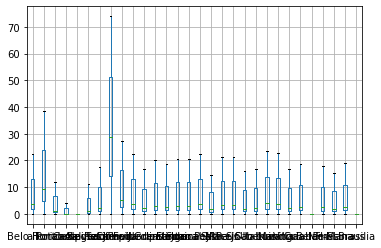

In [289]:
fig = dict['Buy'].set_index('Municipality').T.boxplot(widths = 0.3)

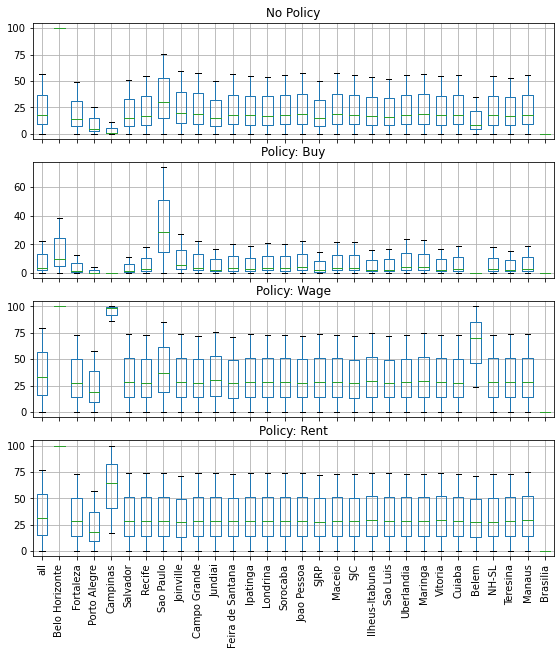

In [368]:
plt.figure(figsize=(8, 8))
plt.ylim((0, 100))
plt.tight_layout()

plt.subplot(4, 1, 1).set_title('No Policy')
dict['No policy'].set_index('Municipality').T.boxplot(widths = 0.6, labels=None).set(xticklabels=[])

plt.subplot(4, 1, 2).set_title('Policy: Buy')
dict['Buy'].set_index('Municipality').T.boxplot(widths = 0.6).set(xticklabels=[])

plt.subplot(4, 1, 3).set_title('Policy: Wage')
dict['Wage'].set_index('Municipality').T.boxplot(widths = 0.6).set(xticklabels=[])

plt.subplot(4, 1, 4).set_title('Policy: Rent')
dict['Rent'].set_index('Municipality').T.boxplot(widths = 0.6)

plt.xticks(rotation=90)


plt.savefig(f'../text/figures/boxplot.png', bbox_inches='tight', transparent=True)
plt.show()